In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import csv
import datetime
from datetime import date
import calendar
import numpy as np
from math import pi
from bokeh.io import show, output_file, output_notebook, reset_output
from bokeh.layouts import column
from bokeh.models import ColumnDataSource, RangeTool
from bokeh.plotting import figure
from bokeh.plotting import figure, output_file, show
from bokeh.plotting import figure, output_notebook, show
from bokeh.models import ColumnDataSource, Plot, LinearAxis, Grid
from bokeh.models.glyphs import Line
from bokeh.transform import cumsum
from bokeh.core.properties import value
from bokeh.palettes import Category20
import seaborn as sns
import matplotlib.pyplot as pyplot
%matplotlib inline

In [2]:
# numeros totales

#palabras promedio por mensaje por usuario
# palabras mas comunes del grupo por a√±o
# palabras mas comunes por usuario




### Import de csv from whatsapp - data formatting

In [ ]:
#read del csv exportado del whatsapp group deseado
#contiene un string por mensaje enviado con informaci√≥n de fecha, usuario y texto

with open('whatsap-group-chat.txt', 'r', encoding="utf8") as myfile:
  data = myfile.read()
sentences = data.split('\n')  
len(sentences)

In [94]:
# producimos y guardamos el DataFrame.
# columnas [user, date, text]

df = pd.DataFrame()
for i in range(1,len(sentences)-1):
    date=None
    usertext=None
    user=None
    text=None
    try:
        date = sentences[i].split('-',1)[0].strip()
        usertext = sentences[i].split('-')[1].strip()
        user = usertext.split(':',1)[0].strip()
        text = usertext.split(':',1)[1].strip()
    except IndexError: 
        pass
    
    
    
    serie = pd.Series([user, date, text], index=['user', 'date', 'text'])
    df = df.append(serie, ignore_index=True)
export_csv = df.to_csv (r'chats-data')


In [2]:
df = pd.read_csv('chats-data') 

In [3]:
#drop de registros con datos nulos

print(df.shape,' tama√±o antes de dropear')
df = df.dropna(axis=0, how='any') # tira las filas que tienen al menos un registro NaN/NaT 
print(df.shape,' tama√±o despues de dropear')

(133500, 4)  tama√±o antes de dropear
(126147, 4)  tama√±o despues de dropear


In [4]:
#convierte la columna date a formato DateTime
df.date = pd.to_datetime(df.date,format='%d/%m/%y %H:%M', errors='coerce')

#crea nuevas columnas en base a datos de fecha

df['week'] = df.date.dt.week
df['year'] = df.date.dt.year
df['month'] = df.date.dt.month
df['weekdaynr'] = df.date.dt.weekday
df['hour'] = df.date.dt.hour
df['date3'] = df.date.dt.date
df['date4'] = df.date.dt.strftime('%m-%Y')
df['weekdaynr'] = df.date.dt.weekday
    
    
    
#dropeamos registros incompletos posterior a la conversi√≥n datetime

print(df.shape,' tama√±o antes de dropear excepciones coerce / NaT values')
df = df.dropna(axis=0, how='any') # tira las filas que tienen al menos un registro NaN/NaT 
print(df.shape,' tama√±o despues de dropear expepciones coerce / NaT values')
df.sample(3)


(126147, 11)  tama√±o antes de dropear excepciones coerce / NaT values
(126143, 11)  tama√±o despues de dropear expepciones coerce / NaT values


Unnamed: 0                date                    text    user  week  \
77692       77692 2018-05-26 17:31:00  ta pagado ese goalkipe    Ilso  21.0   
29333       29333 2017-01-25 08:51:00                  q cosa  Shafal   4.0   
17991       17991 2016-10-04 23:26:00           El garca real   Il So  40.0   

         year  month  weekdaynr  hour       date3    date4  
77692  2018.0    5.0        5.0  17.0  2018-05-26  05-2018  
29333  2017.0    1.0        2.0   8.0  2017-01-25  01-2017  
17991  2016.0   10.0        1.0  23.0  2016-10-04  10-2016

In [68]:
df['weekdaynr'] = df.date.dt.weekday

#creamos la columna weekday acorde al dia de la semana

weekDays = ["Lunes","Martes","Miercoles","Jueves","Viernes","Sabado","Domingo"]
df['weekday'] = df['weekdaynr'].apply(lambda x: weekDays[x])


### DataFrame - sample

In [70]:
df.sample(5)

Unnamed: 0                date  \
64592        64592 2018-01-11 12:28:00   
71347        71347 2018-03-29 13:09:00   
78414        78414 2018-06-06 13:00:00   
120397      120397 2019-08-11 11:27:00   
39277        39277 2017-04-26 22:00:00   

                                                     text          user  week  \
64592   Che estuve hablando con unos franchutes reci√©n...  Fede Sharley   2.0   
71347                                       Que pregunt√≥n     Sebi Cell  13.0   
78414                                     #tutifrutistyle       Joaquin  23.0   
120397                            Anda a la embajada riti      dona Cel  32.0   
39277                                <Multimedia omitido>          Ilso  17.0   

          year  month  weekdaynr  hour       date3    date4    weekday  
64592   2018.0    1.0          3  12.0  2018-01-11  01-2018     Jueves  
71347   2018.0    3.0          3  13.0  2018-03-29  03-2018     Jueves  
78414   2018.0    6.0          2  13.0  2018-06-06  06-2018  Miercoles  
120397  2019.0    8.0          6  11.0  2019-08-11  08-2019    Domingo  
39277   2017.0    4.0          2  22.0  2017-04-26  04-2017  Miercoles

# --- Data Analytics  ---

### lineplot - mensajes por d√≠a 

C:\ProgramData\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


Cantidad de mensajes totales del grupo estudiados: 126143
Cantidad de mensajes promedio por dia: 95.99923896499239
top cinco dias mas activos date3
2018-11-24    1189
2018-04-29     536
2018-02-17     510
2018-10-31     509
2016-04-19     484
Name: date, dtype: int64


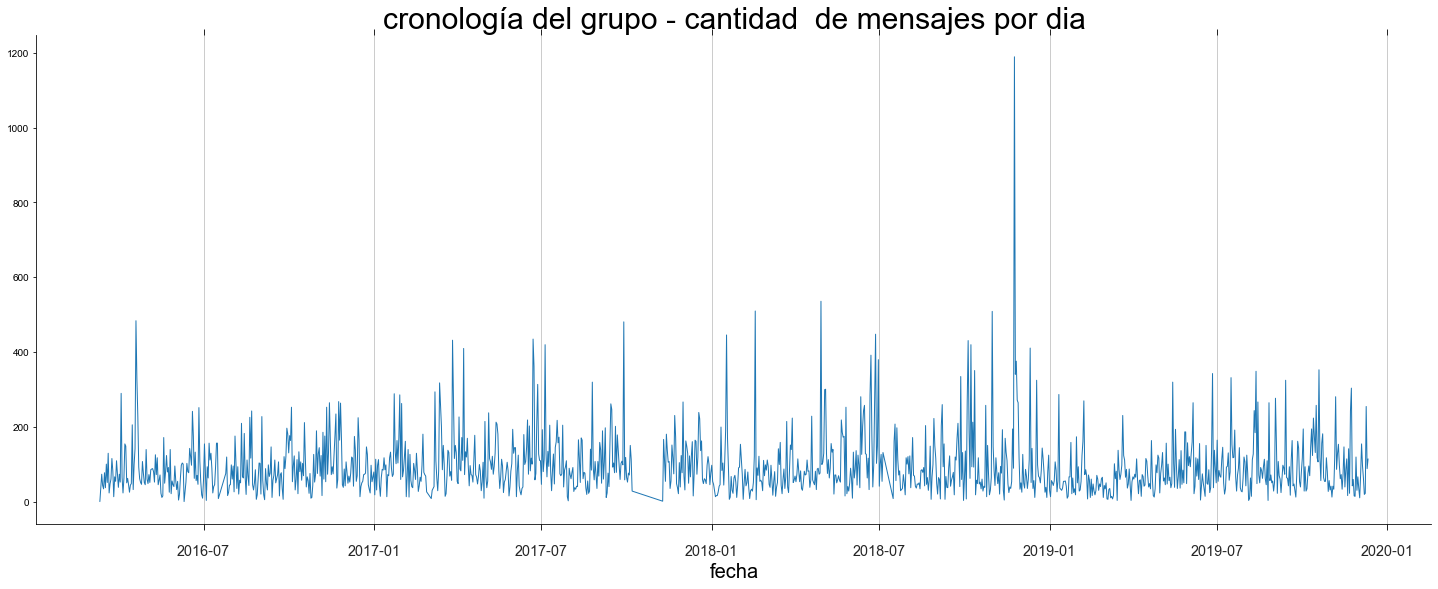

In [6]:
# agrupamos datos por d√≠a en un dataframe y producimos un lineplot

df_graph1 = df.groupby('date3').count()

a4_dims = (25, 9)
fig, ax = pyplot.subplots(figsize=a4_dims)
sns.set(style="white")

plt.xlabel('fecha', fontsize=20)
x = df_graph1.index
y = df_graph1.text

ax.tick_params(axis='x',pad=15,labelsize='large', reset=True, gridOn=True ,width=1)
dates = df['date4']

data = df_graph1.text
datamean = data.rolling(5).mean()
sns.despine()
plt.title('cronolog√≠a del grupo - cantidad  de mensajes por dia', fontsize=30)

sns.lineplot(data=[data], palette="tab10", linewidth=1, legend=False)
print('Cantidad de mensajes totales del grupo estudiados:',df.text.count())
print('Cantidad de mensajes promedio por dia:',df_graph1.date.mean())
print('top cinco dias mas activos',df_graph1.date.sort_values(ascending=False)[0:5])



In [7]:
#sample del d√≠a con mayor actividad del grupo

top_chat_day = df_graph1.date.sort_values(ascending=False).index[0]

print('15 mensajes random del dia mas activo del grupo:',top_chat_day)
df.loc[df['date3'] == top_chat_day].text.sample(15)

15 mensajes random del dia mas activo del grupo: 2018-11-24


97361    "boca los partidos los gana o los pierde en la...
97014                                                Trump
97053                            Dije lo mismo hace 3 a√±os
97415                                              en otra
97746                           La foto del club de amigas
97838                                                   Ah
97417                                         sac√° tus own
97715                                                  üíôüíõüíô
96671                                    No me queda claro
97232                           Listo men que cosa barbara
97316                                        #volvioelhall
97399                                                error
97002                                        Da el ejemplo
97093                        tevez anda a aplaudir a macri
97418                                        own = propias
Name: text, dtype: object


### lineplot - comportamiento por horas por a√±o

tomando el comportamiento del √∫ltimo a√±o
hora del d√≠a con mayor actividad para mejorar tu probabilidad de lectura de tu mensaje -- 12.0 hs
hora del d√≠a con menor actividad para decir algo y pasar desapercibido -- 5.0 hs


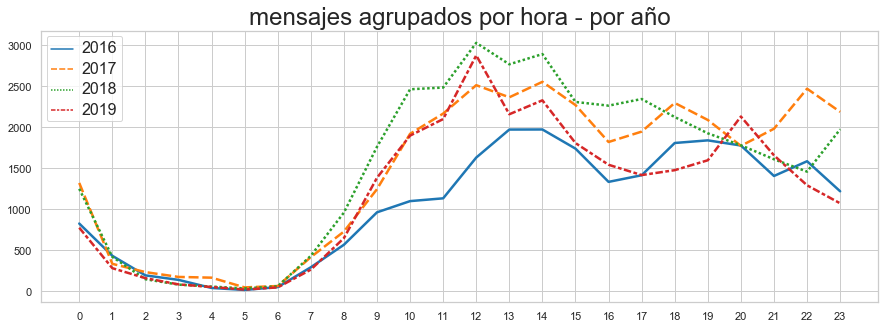

In [65]:
#producimos el grupo de datos agrupados por hora del dia por a√±o para estudiar el comportamiento 
#por hora del grupo

years_lists = df.year.unique()
df_graph2 = pd.DataFrame()

for i in years_lists:
    serie_graph2 = df.loc[df['year'] == i].groupby('hour').count().text.transpose()#.drop(index=i)
    df_graph2 = df_graph2.append(serie_graph2, ignore_index=True)
    
df_graph2.index = years_lists
df_graph2.index = df_graph2.index.astype('int') 



a4_dims = (15, 5)
fig, ax = pyplot.subplots(figsize=a4_dims)

plt.title('mensajes agrupados por hora - por a√±o', fontsize=24)
sns.set()


sns.set(style="whitegrid")
data = df_graph2.transpose()
sns.lineplot(data=data, palette="tab10", linewidth=2.5, legend="full")
plt.setp(ax.get_legend().get_texts(), fontsize='16') # for legend text

ax.set_xticks(sorted(df.hour.unique()))

ultimo_a√±o_msg_x_hora = data[data.columns[-1]]
print('tomando el comportamiento del √∫ltimo a√±o')
print('hora del d√≠a con mayor actividad para mejorar tu probabilidad de lectura de tu mensaje --',ultimo_a√±o_msg_x_hora.idxmax(),'hs') 
print('hora del d√≠a con menor actividad para decir algo y pasar desapercibido --',ultimo_a√±o_msg_x_hora.idxmin(),'hs')

In [9]:
#agrupamos datos para estudiar gr√°fico de actividad por usuario por a√±o-

df_graph3 = df[['year','user','text']].groupby(['year','user']).count()
df_graph3 = df_graph3.sort_values(by=['year','text'], ascending=[False,False])
df_grpah_unstacked = df_graph3.unstack().transpose()
df_grpah_unstacked.index = [i[1] for i in df_grpah_unstacked.index]
df_grpah_unstacked = df_grpah_unstacked.fillna(0)

dict1 = {'years' : df_grpah_unstacked.columns.values.tolist()}
indexlist = list( map(str, df_grpah_unstacked.index))
dict2 = dict(zip(indexlist,df_grpah_unstacked.values.tolist()))
dict1.update(dict2)


a = Category20[20]
b = Category20[20]

colorrr = a + b
users = [df_grpah_unstacked.index.values]

### stacked graph - actividad por usuario por a√±o

In [73]:
reset_output()
output_file("msg_user_year_stackedgraph.html")


years = [df_grpah_unstacked.columns.values]
users = [df_grpah_unstacked.index.values]
colors = colorrr[0:len(df_grpah_unstacked.index)]

data = dict1


users = list( map(str, df_grpah_unstacked.index))

p = figure(plot_height=500,plot_width=800, title="Mensajes por a√±o",
           toolbar_location="right", tools="wheel_zoom,pan,hover,box_select,reset,save", tooltips="$name @$name")#, x_range=years)

p.vbar_stack(users, x='years', width=0.6, source=data, color=colors)# legend=value(users))



p.title.text_font_size = '15pt'
p.y_range.start = 0
p.x_range.range_padding = 0.5
p.xgrid.grid_line_color = None
p.axis.minor_tick_line_color = None
p.outline_line_color = None

show(p)


### mensajes multimedia

In [11]:
multimedia_msgs = df.loc[df['text'] == '<Multimedia omitido>'].groupby('user').count().sort_values('date', ascending=[False])
multimedia_msgs = multimedia_msgs.text

print('los tres miembros del grupo que mas mensajes multimedia envian al grupo y deberias conversar para ahorrar en tarjetas de memoria')
multimedia_msgs[0:3]


los tres miembros del grupo que mas mensajes multimedia envian al grupo y deberias conversar para ahorrar en tarjetas de memoria


user
Fede Sharley    3823
Pon Cl          1402
Shafal          1321
Name: text, dtype: int64

### Pie chart - participaci√≥n por usuario total

In [30]:
reset_output()
output_file("msg_user_piegraph.html")

colors = colorrr[0:len(multimedia_msgs.index)]

data = pd.Series(multimedia_msgs).reset_index(name='value').rename(columns={'index':'usuario'})
data['angle'] = data['value']/data['value'].sum() * 2*pi
data['color'] = colors
data = data.sort_values(by=['value'], ascending=[False])
p = figure(toolbar_location="right", plot_height=350, title="Mensajes multimedia enviados", 
           tools="hover,reset,save", tooltips="@user: @value", x_range=(-0.5, 1.0))

p.wedge(x=0, y=1, radius=0.4,
        start_angle=cumsum('angle', include_zero=True), end_angle=cumsum('angle'),
        line_color="white", fill_color='color', source=data )
p.title.text_font_size = '12pt'
p.axis.axis_label=None
p.axis.visible=False
p.grid.grid_line_color = None

show(p)

### repasamos los analytics en strings que encontramos previamente

In [29]:
#agrupamos todos los analytics generados en formato string
print('Cantidad de mensajes totales del grupo estudiados:',df.text.count())
print()
print('Cantidad de mensajes promedio por dia:',df_graph1.date.mean())
print()
print('top cinco dias mas activos',df_graph1.date.sort_values(ascending=False)[0:5])
print()
print('15 mensajes random del dia mas activo del grupo:',top_chat_day)
df.loc[df['date3'] == top_chat_day].text.sample(15)
print()
print('los tres miembros del grupo que mas mensajes multimedia envian al grupo')
print()
print(multimedia_msgs[0:3])



Cantidad de mensajes totales del grupo estudiados: 126143

Cantidad de mensajes promedio por dia: 95.99923896499239

top cinco dias mas activos date3
2018-11-24    1189
2018-04-29     536
2018-02-17     510
2018-10-31     509
2016-04-19     484
Name: date, dtype: int64

15 mensajes random del dia mas activo del grupo: 2018-11-24

los tres miembros del grupo que mas mensajes multimedia envian al grupo

user
Fede Sharley    3823
Pon Cl          1402
Shafal          1321
Name: text, dtype: int64


### WORD CLOUD y analytics de palabras

In [96]:
from nltk import word_tokenize, sent_tokenize
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Joaquin\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


True

In [105]:
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Joaquin\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Joaquin\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\wordnet.zip.


True

In [204]:
df_text = df[['text','user']]

df_text = df_text.drop(df_text.loc[df_text['text'] == '<Multimedia omitido>'].index)

# df_text = df_text.str.split() METODO MEJORADO / BORRAR

sample = df_text.sample(1000)
df_text

text              user
0                   Eey que onda esta banda?           Rama cl
1             No hay nadie en el peishe cats         Riti Cell
2       Tengo fiesta con minas y barra libre        Pelado Ale
3                               Alguno est√°?        Pelado Ale
5                                    Vamoooo            Uba Cl
...                                      ...               ...
133494                                    ah  +34 695 21 68 09
133496                    Todos los planeros      Fede Sharley
133497                                    Ah      Fede Sharley
133498                              New rich         Muse Cell
133499                              Uuuuoooo            Pon Cl

[112601 rows x 2 columns]

In [205]:
def remove_emoji(string):
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', string)

sample['text_no_emot'] = sample.text.apply(remove_emoji)

In [206]:
sample['tokened'] = sample.text_no_emot.apply(word_tokenize)

In [207]:
def to_lowercase(words):
    minusculas = [i.lower() for i in words]
    
    return minusculas

sample['normal'] = sample.tokened.apply(to_lowercase)

In [210]:
from nltk.corpus import stopwords

def remove_stopwords(words):
    stop = [word for word in words if word not in stopwords.words('spanish')]
    return stop

sample['nonstop'] = sample.normal.apply(remove_stopwords)


In [226]:
def removePunc(wordList):
    palabras_list=[]
#     puncList = [".",";",":","!","?","/","\\",",",")","(","\""]
    puncList = [["."],[";"],[":"],["!"],["?"],["/"],[","],[")"],["("],["..."],[".."],[", "],[",,"],[" "],["#"],["!"],["."] ]  
    lista = [i.strip().split(',') for i in wordList]
    
    for element in lista:
        palabras = element 
        
        if palabras in puncList:
            pass
        else:
            palabras_list.append(palabras)
            
            
                                            
    return palabras_list

sample['clean_text'] = sample.nonstop.apply(removePunc)


In [237]:
palabras = pd.DataFrame({'palabra':','.join(sample.nonstop.apply(lambda x:','.join(x))).split(',')})

#palabras = pd.DataFrame({'palabra':','.join(sample.clean_text.apply(lambda x:','.join([str(i) for i in x]))).split(',')})


palabras.groupby('palabra').size().reset_index().rename(columns={0:'cantidad'}).sort_values('cantidad',ascending=False).head(30)

palabra  cantidad
0                    172
66           ?       126
90          ah        44
1191         q        41
10           .        39
1310        si        26
1            !        24
732     jajaja        21
685        hoy        17
397       dale        15
735   jajajaja        14
206       bien        14
702         in        13
11         ...        13
64           :        12
79         ac√°        11
730       jaja        11
67           @        11
391       c√≥mo        10
68          ``        10
831       lobo        10
5           ''         9
1538     vitri         9
1476        va         9
105    alguien         9
285        che         9
906        men         9
860        mal         8
1124       pio         8
1094      pela         8

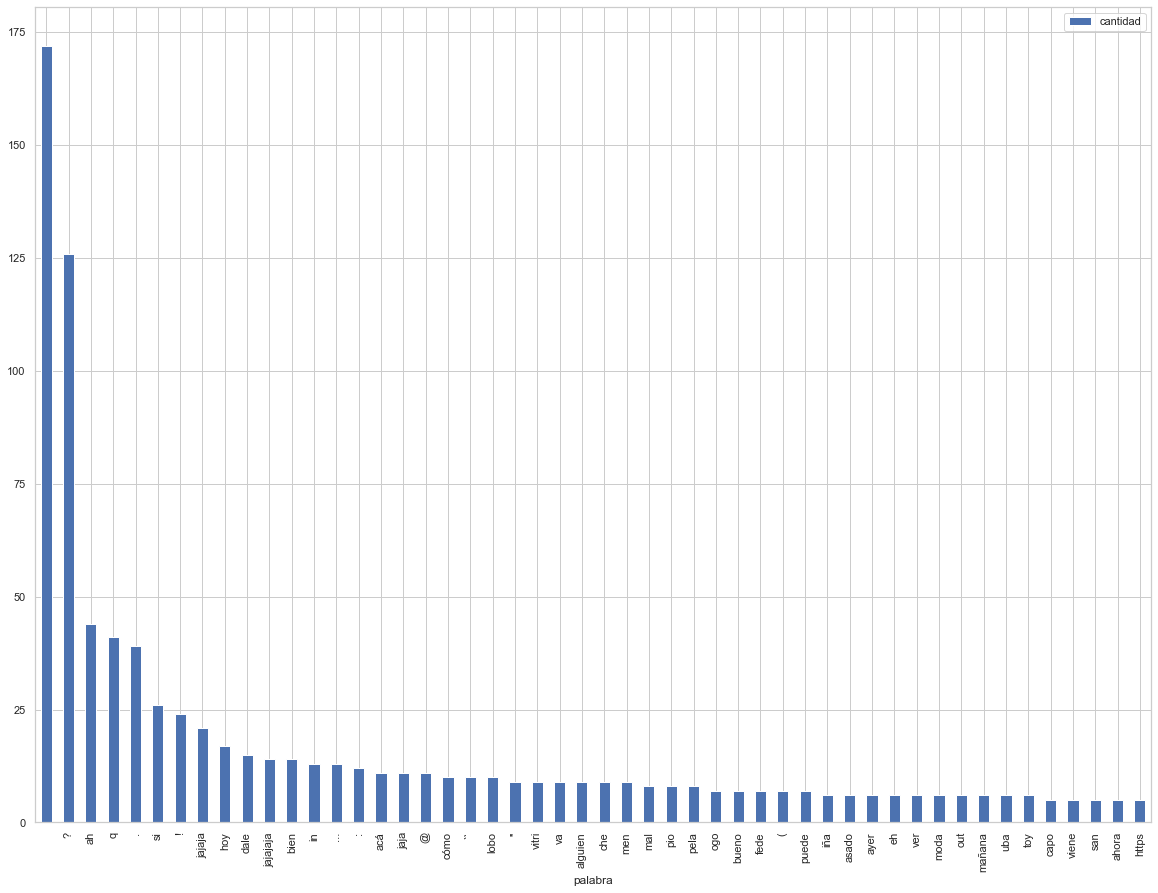

In [212]:
#solo las primeras 50 palabras mas comunes

plt.rcParams['figure.figsize'] = [20, 15]
palabras.groupby('palabra').size().reset_index().rename(columns={0:'cantidad'}).sort_values('cantidad',ascending=False).iloc[:50,:].plot.bar(y='cantidad',x='palabra')

(-0.5, 399.5, 399.5, -0.5)

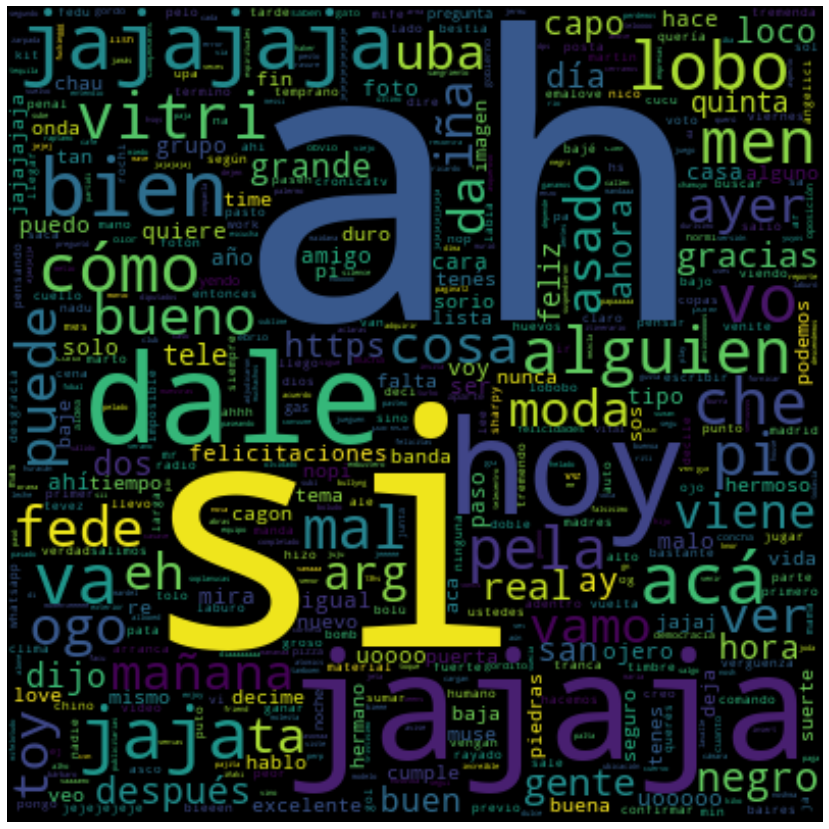

In [213]:
import os
import matplotlib.pyplot as plt
from wordcloud import WordCloud

palabrasWC = ' '.join(sample.nonstop.apply(lambda x:' '.join(x)))
wordcloud = WordCloud(height=400,width=400,max_words=800,collocations=False).generate(palabrasWC)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")


In [231]:
sample.sample(30)

text          user  \
5942    En la uca tir√≥ la inedita de que un profe lo b...     Riti Cell   
118327                                                  üôä       Oguitoo   
16946                                     Secrets in Tolo  Fede Sharley   
33221                                              310 km      I√±a Cell   
92502                               Ven√≠ al pez moda gato       Rama cl   
83333                          Expresi√≥n motivacional: ah     Sebi Cell   
35391                        El burrito Mart√≠nez en V√©lez        Pon Cl   
125678                       O las decis para consolarte?       Lobo cl   
29333                                              q cosa        Shafal   
75239                                           Incre√≠ble       Moda Cl   
113380                                     Jajaja sublime        Uba Cl   
23856                                         Time travel       Oguitoo   
101315                                           Bieeeeen    Pelado Ale   
43881                                              Eyes üëÄ       Moda Cl   
86568                                            Jajajaja       Moda Cl   
61057   dale quinta coge y graba disco al mismo al tiempo       Lobo cl   
20086                                                  Ja       Oguitoo   
18966                                                 Goo     Sebi Cell   
18830                                        Cobro barato  Fede Sharley   
5317                                 Vienen? Llamen minas    Pelado Ale   
19660                                La banda del subte E        Pon Cl   
105059                                           Para eso       Lobo cl   
110954                                             Uooooo  Fede Sharley   
16530      si ves esa, te cae la DEA en tu casa en 10 min  Fede Sharley   
22261                                            Que taza  Fede Sharley   
106969                                                 Ah  Fede Sharley   
26364                                       Despu√©s dados       Rama cl   
123452                                             Jeeeee     Muse Cell   
37540         De un judio y un tano yo ya se como fue eso  Fede Sharley   
103002                                           = 1 Moda  Fede Sharley   

                                             text_no_emot  \
5942    En la uca tir√≥ la inedita de que un profe lo b...   
118327                                                      
16946                                     Secrets in Tolo   
33221                                              310 km   
92502                               Ven√≠ al pez moda gato   
83333                          Expresi√≥n motivacional: ah   
35391                        El burrito Mart√≠nez en V√©lez   
125678                       O las decis para consolarte?   
29333                                              q cosa   
75239                                           Incre√≠ble   
113380                                     Jajaja sublime   
23856                                         Time travel   
101315                                           Bieeeeen   
43881                                               Eyes    
86568                                            Jajajaja   
61057   dale quinta coge y graba disco al mismo al tiempo   
20086                                                  Ja   
18966                                                 Goo   
18830                                        Cobro barato   
5317                                 Vienen? Llamen minas   
19660                                La banda del subte E   
105059                                           Para eso   
110954                                             Uooooo   
16530      si ves esa, te cae la DEA en tu casa en 10 min   
22261                                            Que taza   
106969                                                 Ah   
26364                                       Despu√©s dados  